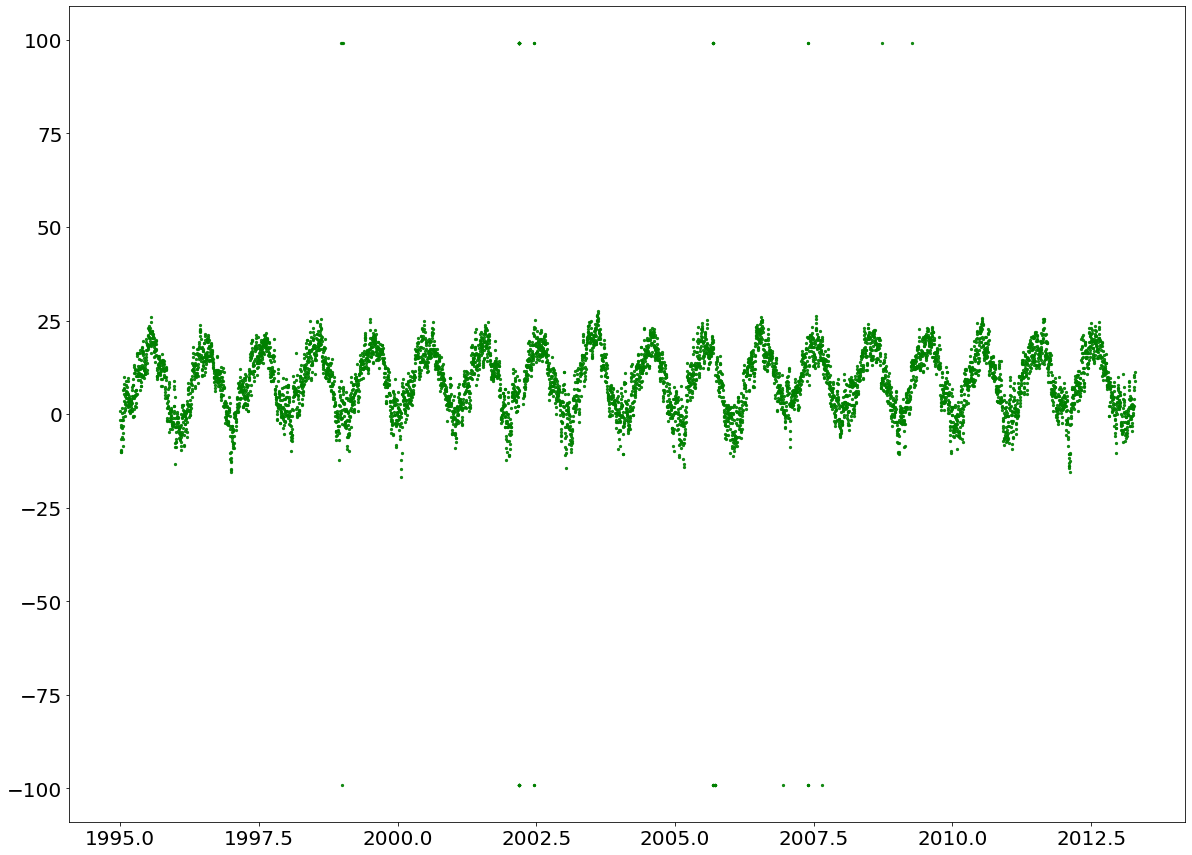

In [46]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def poly4(x,a,b,c,d,e):
    return (a*(x**4))+(b*(x**3))+(c*(x**2))+(d*x)+c

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1] 

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date,Temp,s=5,c='g',alpha=0.9)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


Amplitude: -9.955382434640047 +/- 0.004343395726523154
Period: 6.2816781926328025 +/- 1.5807005942680571e-06
Phase Shift: -543.869470831214 +/- 6.349190913627127
Vertical Shift: 9.039785370368724 +/- 0.0021827532890908445

Predicted High/Low: 18.995167769126336 , -0.9155968078139427
Record High/Low: 27.6667 , -16.7778
Average Temperature in Munich: 8.933222104668388


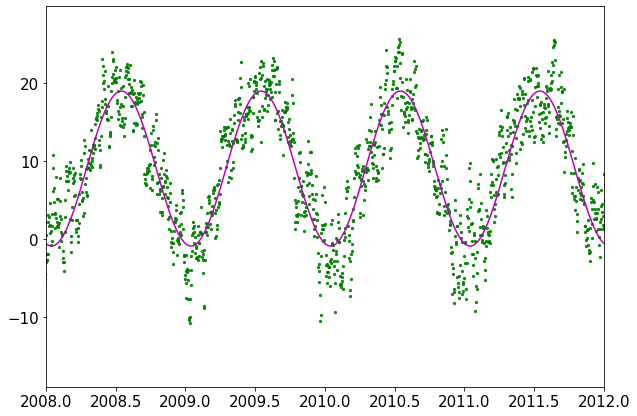

In [47]:
gd1 = (Date > 0) & (Temp >- 90) &\
    (Date < 3000) & (Temp < 90)
good1 = np.where(gd1)[0]

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[gd1],Temp[gd1],s=5,c='g',alpha=0.9)

ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)

popt5, pcov5 = opt.curve_fit(cosfit,Date[gd1],Temp[gd1],p0=[50,6,20,10])
print("Amplitude:",popt5[0],"+/-",pcov5[0][0])
print("Period:",popt5[1],"+/-",pcov5[1][1])
print("Phase Shift:",popt5[2],"+/-",pcov5[2][2])
print("Vertical Shift:",popt5[3],"+/-",pcov5[3][3])
print()
#plt.plot(Date,cosfit(Date,20,8,1,7),c='b')
plt.plot(Date,cosfit(Date,*popt5),c='m')

p_high = 0
p_low = 1000
for p in cosfit(Date,*popt5):
    if p > p_high:
        p_high = p
    if p < p_low:
        p_low = p
    p += 1
print("Predicted High/Low:",p_high,",",p_low)

r_high = 0
r_low = 1000
for r in Temp[gd1]:
    if r > r_high:
        r_high = r
    if r < r_low:
        r_low = r
    r += 1
print("Record High/Low:",r_high,",",r_low)

asum = 0
counter = 0
for a in Temp[gd1]:
    asum += a
    counter += 1
print("Average Temperature in Munich:",(asum/counter))

plt.xlim(2008,2012)
plt.show()

In [48]:
# LINEAR MC FIT

def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
#popt,pcov  = mcFit(data['X'], data['Y'], data['X_ERR'],data['Y_ERR'])

# 3 PARAMETER MC FIT
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):
    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y

        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])
    
    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]
# To run example
#popt,pcov = mcFit(poly2, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

# 4 PARAMETER MC FIT
def mcFit4param(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

# 5 PARAMETER MC FIT

# To run example
#popt,pcov = mcFit(cosfit, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

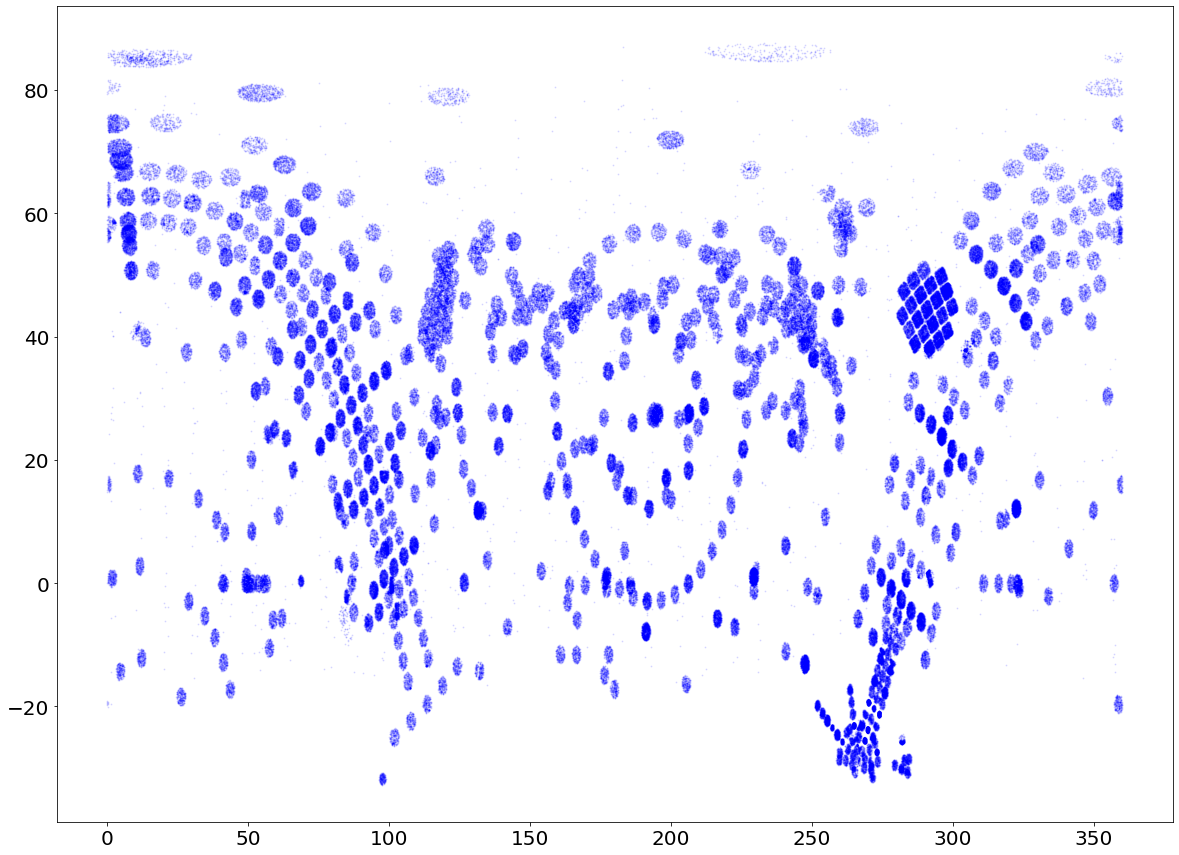

In [49]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def poly4(x,a,b,c,d,e):
    return (a*(x**4))+(b*(x**3))+(c*(x**2))+(d*x)+e

def poly5(x,a,b,c,d,e,f):
    return (a*(x**5))+(b*(x**4))+(c*(x**3))+(d*(x**2))+(e*x)+f

def poly6(x,a,b,c,d,e,f,g):
    return (a*(x**6))+(b*(x**5))+(c*(x**4))+(d*(x**3))+(e*(x**2))+(f*x)+g

def poly7(x,a,b,c,d,e,f,g,h):
    return (a*(x**7))+(b*(x**6))+(c*(x**5))+(d*(x**4))+(e*(x**3))+(f*(x**2))+(g*x)+h

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolean Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

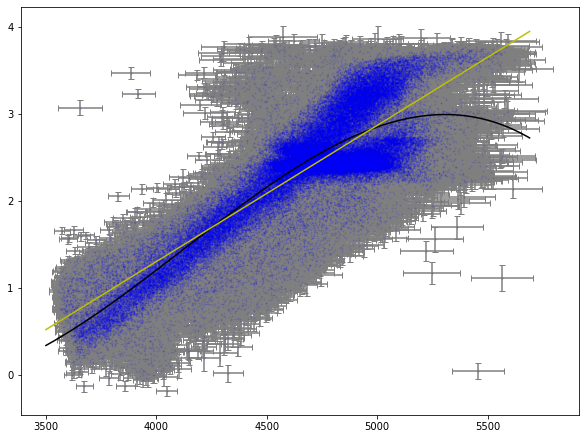

Best-fit values of the parameters: -4.684915643286816e-10 5.798420425682019e-06 -0.021958725254767882 26.246007570476973
Third-degree polynomial (poly3) fits the data best.


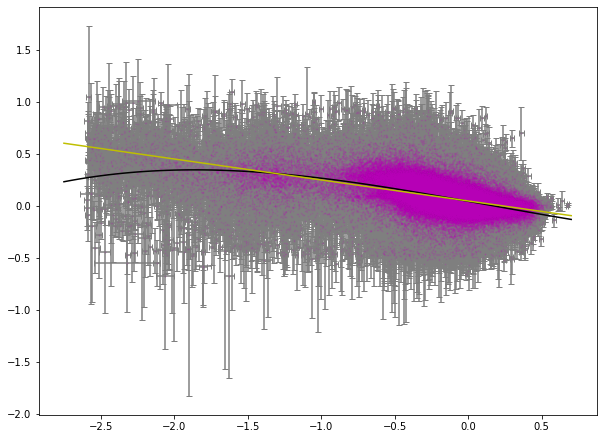

Best-fit values of the parameters: 0.02089207726799274 -0.009515742361066575 -0.2525360175067766 0.046128695676610564
Third-degree polynomial (poly3) fits the data best.


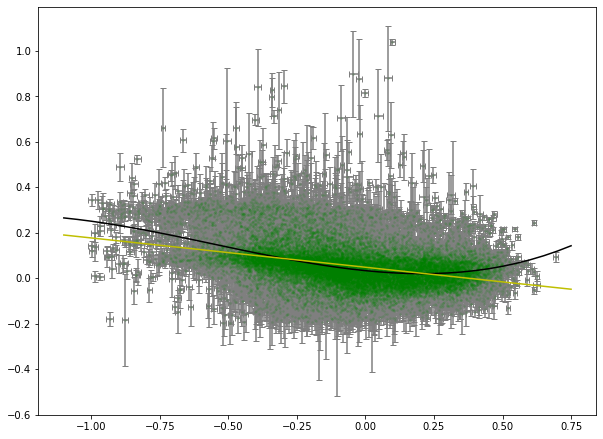

Best-fit values of the parameters: 0.14829476322103263 0.24480793626453226 -0.12102532118968733 0.03376923837579085
Third-degree polynomial (poly3) fits the data best.


In [50]:
bits1 = 2**23
suspect1 = 2**16
data = star['GLAT']

# Problem (a)

gd1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['GLAT']) > -1) &\
     ((star['GLAT']) > 1) &\
     ((star['LOGG_ERR']) > 0) &\
     ((star['TEFF_ERR']) > 0) 
mask1 = np.where(gd1)[0]

xplot1 = np.arange(3500,5700,10)
fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
ax1.scatter(star['TEFF'][gd1],star['LogG'][gd1],s=1,c='b',alpha=0.1)
popt_a, pcov_a = mcFit4param(poly3,star['TEFF'][gd1],star['LogG'][gd1],star['TEFF_ERR'][gd1],
                             star['LOGG_ERR'][gd1],[0,0,0,0])
plt.plot(xplot1,poly3(xplot1,*popt_a),c='k')
popt_a2, pcov_a2 = mcFitLine(star['TEFF'][gd1],star['LogG'][gd1],star['TEFF_ERR'][gd1],star['LOGG_ERR'][gd1])
plt.plot(xplot1,linear(xplot1,*popt_a2),c='y')
ax1.errorbar(star['TEFF'][gd1],star['LogG'][gd1],xerr=star['TEFF_ERR'][gd1], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax1.errorbar(star['TEFF'][gd1],star['LogG'][gd1],yerr=star['LOGG_ERR'][gd1], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.show()
print("Best-fit values of the parameters:",*popt_a)
print("Third-degree polynomial (poly3) fits the data best.")


# Problem (b)

gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['Fe_H_ERR']) > 0) &\
     ((star['O_FE_ERR']) > 0) &\
     ((star['GLAT'] > 10) | (star['GLAT'] < -10))
mask2 = np.where(gd2)[0]

xplot2 = np.arange(-2.75,0.75,0.05)
fig2 = plt.figure(figsize=(10,7.5))
ax2 = fig2.add_subplot(111)
ax2.scatter(star['Fe_H'][gd2],star['O_FE'][gd2],s=1,c='m',alpha=0.1)
popt_b, pcov_b = mcFit4param(poly3,star['Fe_H'][gd2],star['O_FE'][gd2],star['Fe_H_ERR'][gd2],
                             star['O_FE_ERR'][gd2],[0,0,0,0])
plt.plot(xplot2,poly3(xplot2,*popt_b),c='k')
popt_b2, pcov_b2 = mcFitLine(star['Fe_H'][gd2],star['O_FE'][gd2],star['Fe_H_ERR'][gd2],star['O_FE_ERR'][gd2])
plt.plot(xplot2,linear(xplot2,*popt_b2),c='y')
ax2.errorbar(star['Fe_H'][gd2],star['O_FE'][gd2],xerr=star['Fe_H_ERR'][gd2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax2.errorbar(star['Fe_H'][gd2],star['O_FE'][gd2],yerr=star['O_FE_ERR'][gd2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.show()
print("Best-fit values of the parameters:",*popt_b)
print("Third-degree polynomial (poly3) fits the data best.")


# Problem (c)

gd3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['Fe_H_ERR']) > 0) &\
     ((star['O_FE_ERR']) > 0) &\
     ((star['Fe_H']) > -1.0) &\
     ((star['O_FE']) > -0.2) &\
     ((star['GLAT']) > -2) &\
     ((star['GLAT']) < 2)
mask3 = np.where(gd3)[0]

xplot3 = np.arange(-1.1,0.8,0.05)
fig3 = plt.figure(figsize=(10,7.5))
ax3 = fig3.add_subplot(111)
ax3.scatter(star['Fe_H'][gd3],star['O_FE'][gd3],s=3,c='g',alpha=0.1)
popt_c, pcov_c = mcFit4param(poly3,star['Fe_H'][gd3],star['O_FE'][gd3],star['O_FE_ERR'][gd3],
                             star['Fe_H_ERR'][gd3],[0,0,0,0])
plt.plot(xplot3,poly3(xplot3,*popt_c),c='k')
popt_c2, pcov_c2 = mcFitLine(star['Fe_H'][gd3],star['O_FE'][gd3],star['O_FE_ERR'][gd3],star['Fe_H_ERR'][gd3])
plt.plot(xplot3,linear(xplot3,*popt_c2),c='y')
ax3.errorbar(star['Fe_H'][gd3],star['O_FE'][gd3],xerr=star['Fe_H_ERR'][gd3], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax3.errorbar(star['Fe_H'][gd3],star['O_FE'][gd3],yerr=star['O_FE_ERR'][gd3], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.show()
print("Best-fit values of the parameters:",*popt_c)
print("Third-degree polynomial (poly3) fits the data best.")

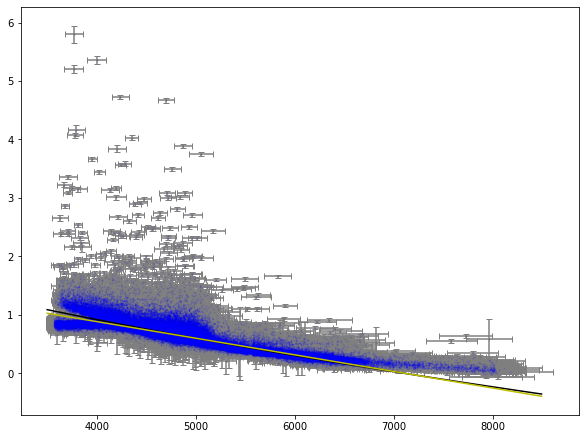

Best-fit values of the parameters: -5.97095879041496e-13 2.0743471275235905e-08 -0.0004696566253445005 2.5052565840977734
Third-degree polynomial (poly3) fits the data best.


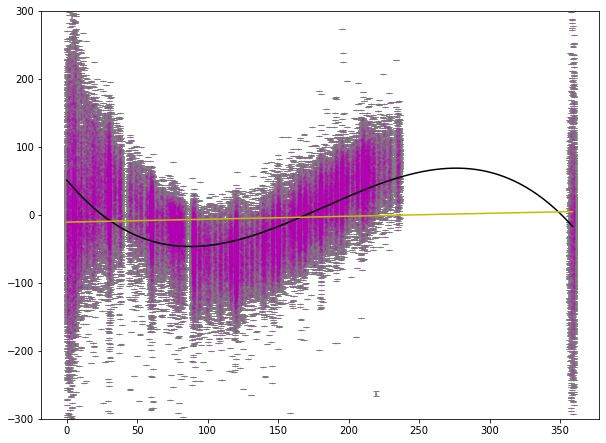

Best-fit values of the parameters: -3.435763140158227e-05 0.01875786355926285 -2.496524120875704 51.374097184842604
Third-degree polynomial (poly3) fits the data best.
(Linear Fit does not work well in this case.)


In [51]:
# Problem (d)

gd4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['TEFF_ERR']) > 0) &\
     (star['J_ERR'] < 5) &\
     (star['K_ERR'] < 5) &\
     (star['J_ERR'] > -5) &\
     (star['K_ERR'] > -5) &\
     ((star['GLAT'] > 10) | (star['GLAT'] < -10))
mask4 = np.where(gd4)[0]

xplot4 = np.arange(3500,8500,10)
fig4 = plt.figure(figsize=(10,7.5))
ax4 = fig4.add_subplot(111)
ax4.scatter(star['TEFF'][gd4],(star['J'][gd4] - star['K'][gd4]),s=1,c='b',alpha=0.1)
popt_d, pcov_d = mcFit4param(poly3,star['TEFF'][gd4],(star['J'][gd4] - star['K'][gd4]),
                             np.sqrt((star['J_ERR'][gd4])**2 + (star['K_ERR'][gd4])**2),
                             star['TEFF_ERR'][gd4],[0,0,0,0])
plt.plot(xplot4,poly3(xplot4,*popt_d),c='k')
popt_d2, pcov_d2 = mcFitLine(star['TEFF'][gd4],(star['J'][gd4] - star['K'][gd4]),
                             np.sqrt((star['J_ERR'][gd4])**2 + (star['K_ERR'][gd4])**2),star['TEFF_ERR'][gd4])
plt.plot(xplot4,linear(xplot4,*popt_d2),c='y')
ax4.errorbar(star['TEFF'][gd4],(star['J'][gd4] - star['K'][gd4]),xerr=star['TEFF_ERR'][gd4], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax4.errorbar(star['TEFF'][gd4],(star['J'][gd4] - star['K'][gd4]),
             yerr=(np.sqrt((star['J_ERR'][gd4])**2 + (star['K_ERR'][gd4])**2)), c='tab:gray', 
             fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.show()
print("Best-fit values of the parameters:",*popt_d)
print("Third-degree polynomial (poly3) fits the data best.")

# Problem (e)

gd5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['VERR']) > 0) &\
     (star['GLON'] < 360) &\
     (star['GLAT'] > -10) &\
     (star['GLAT'] < 10)
mask5 = np.where(gd5)[0]

xplot5 = np.arange(0,360,1)
fig5 = plt.figure(figsize=(10,7.5))
ax5 = fig5.add_subplot(111)
ax5.scatter(star['GLON'][gd5],star['VHELIO_AVG'][gd5],s=1,c='m',alpha=0.1)
popt_e, pcov_e = mcFit4param(poly3,star['GLON'][gd5],star['VHELIO_AVG'][gd5],star['VERR'][gd5],[0],[0,0,0,0])
plt.plot(xplot5,poly3(xplot5,*popt_e),c='k')
popt_e2, pcov_e2 = mcFitLine(star['GLON'][gd5],star['VHELIO_AVG'][gd5],star['VERR'][gd5],0)
plt.plot(xplot5,linear(xplot5,*popt_e2),c='y')
plt.ylim(-300,300)
ax5.errorbar(star['GLON'][gd5],star['VHELIO_AVG'][gd5],yerr=star['VERR'][gd5], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.show()
print("Best-fit values of the parameters:",*popt_e)
print("Third-degree polynomial (poly3) fits the data best.")
print("(Linear Fit does not work well in this case.)")

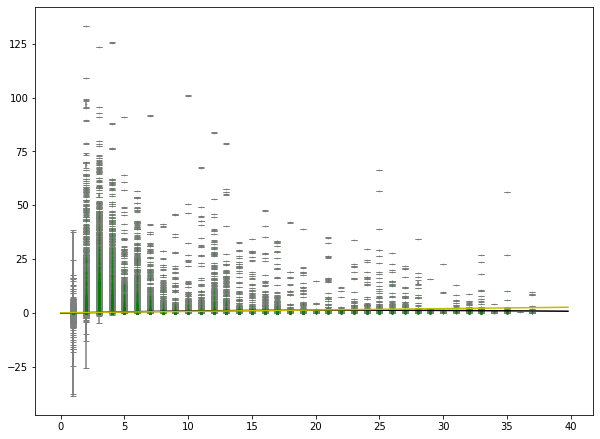

Best-fit values of the parameters: 3.340112515589087e-05 -0.004331000526463689 0.1423826309328864 0.012577340501205521
Third-degree polynomial (poly3) fits the data best.


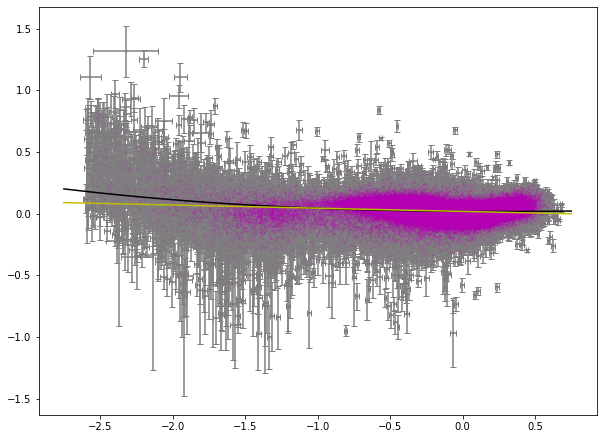

Best-fit values of the parameters: -0.0019434318966510794 0.01611485090350543 -0.007353034490287963 0.01839307573759554
Third-degree polynomial (poly3) fits the data best.


In [52]:
# Problem (f)

gd6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['VERR']) > 0) &\
     (star['VERR'] < 50) &\
     (star['VSCATTER'] < 200)
mask6 = np.where(gd6)[0]

xplot6 = np.arange(0,40,.2)
fig6 = plt.figure(figsize=(10,7.5))
ax6 = fig6.add_subplot(111)
ax6.scatter(star['NVISITS'][gd6],star['VSCATTER'][gd6],s=1,c='g',alpha=0.1)
popt_f, pcov_f = mcFit4param(poly3,star['NVISITS'][gd6],star['VSCATTER'][gd6],star['VERR'][gd6],[0],[0,0,0,0])
plt.plot(xplot6,poly3(xplot6,*popt_f),c='k')
popt_f2, pcov_f2 = mcFitLine(star['NVISITS'][gd6],star['VSCATTER'][gd6],star['VERR'][gd6],[0])
plt.plot(xplot6,linear(xplot6,*popt_f2),c='y')
ax6.errorbar(star['NVISITS'][gd6],star['VSCATTER'][gd6],yerr=star['VERR'][gd6], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.show()
print("Best-fit values of the parameters:",*popt_f)
print("Third-degree polynomial (poly3) fits the data best.")


# Problem (g)

gd7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['NI_FE'] > -1) &\
     (star['Fe_H_ERR'] > 0) &\
     (star['NI_FE_ERR'] > 0) &\
     (star['NI_FE_ERR'] < 1.5)
mask7 = np.where(gd7)[0]

xplot7 = np.arange(-2.75,.8,.05)
fig7 = plt.figure(figsize=(10,7.5))
ax7 = fig7.add_subplot(111)
ax7.scatter(star['Fe_H'][gd7],star['NI_FE'][gd7],s=1,c='m',alpha=.1)
popt_g, pcov_g = mcFit4param(poly3,star['Fe_H'][gd7],star['NI_FE'][gd7],star['Fe_H_ERR'][gd7],
                             star['NI_FE_ERR'][gd7],[0,0,0,0])
plt.plot(xplot7,poly3(xplot7,*popt_g),c='k')
popt_g2, pcov_g2 = mcFitLine(star['Fe_H'][gd7],star['NI_FE'][gd7],star['Fe_H_ERR'][gd7],star['NI_FE_ERR'][gd7])
plt.plot(xplot7,linear(xplot7,*popt_g2),c='y')
ax7.errorbar(star['Fe_H'][gd7],star['NI_FE'][gd7],xerr=star['Fe_H_ERR'][gd7], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax7.errorbar(star['Fe_H'][gd7],star['NI_FE'][gd7],yerr=star['NI_FE_ERR'][gd7], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.show()
print("Best-fit values of the parameters:",*popt_g)
print("Third-degree polynomial (poly3) fits the data best.")